In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plot

In [2]:
def SVM(delta,iternum,X_train,y_train,X_test,y_test,threshold):

    #Initialize linear model parameters. Set all parameter into one
    W = np.ones((X.shape[1],1))
    b = 1
    C = 10

    Ctrain = []
    Cvalidation = []
    Accuracy = []
    for i in range(iternum):
        trainCount = 0
        validationCount = 0        
        GW = 0
        Gb = 0
        AccurateCount = 0
        for j in range(X_train.shape[0]):
            if (1-y_train[j]*(X_train[j].dot(W)+b)) > 0 :
                trainCount += C*(1-y_train[j]*(X_train[j].dot(W)+b))
                Gb += C*-1*y_train[j]
                GW += C*-1*y_train[j]*X_train[j]

        for j in range(X_test.shape[0]):
            if (X_test[j].dot(W)+b >= threshold) and y_test[j] == 1 :
                AccurateCount +=1
            if (X_test[j].dot(W)+b < threshold) and y_test[j] == -1 :
                AccurateCount +=1
            if (1-y_test[j]*(X_test[j].dot(W)+b)) > 0 :
                validationCount += C*(1-y_test[j]*(X_test[j].dot(W)+b))
                    
        Ctrain.append(np.sum(trainCount/X_train.shape[0] + 0.5*np.sum(W.T.dot(W))))
        Cvalidation.append(np.sum(validationCount/X_test.shape[0] + 0.5*np.sum(W.T.dot(W))))
        Accuracy.append(AccurateCount/X_test.shape[0])
        GW = GW.T/X_train.shape[0] + W
        Gb = Gb/X_train.shape[0]
        DW = -GW
        Db = -Gb
        W = W + delta*DW
        b = b + delta*Db
    return Ctrain,Cvalidation,Accuracy
def get_data():
    data = load_svmlight_file("C:/Users/Administrator/Desktop/australian.txt")
    return data[0], data[1]

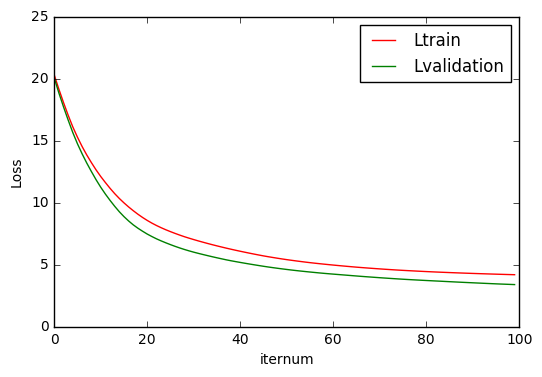

In [3]:
X,y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.todense()
y_train = y_train.reshape(y_train.shape[0],1)
X_test = X_test.todense()
y_test = y_test.reshape(y_test.shape[0],1)
learnrate=0.01
iternum=100
Ltrain,Lvalidation,Accuracy = SVM(learnrate,iternum,X_train,y_train,X_test,y_test,0.5)
plot.figure(1)
x = np.arange(0, iternum, 1)
plot.xlabel('iternum')
plot.ylabel('Loss')
plot.plot(x,Ltrain,color="r",label = "Ltrain")
plot.plot(x,Lvalidation,color="g",label = "Lvalidation")
plot.legend(loc='upper right')
plot.show()